In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df_lok = pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv")
df_vidhan = pd.read_csv("https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv")

In [ ]:
df_vidhan.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [ ]:
df_vidhan.shape

(327294, 11)

In [ ]:
df_vidhan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  object 
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     311211 non-null  object 
 4   ac_type     327294 non-null  object 
 5   cand_name   327294 non-null  object 
 6   cand_sex    321992 non-null  object 
 7   partyname   327294 non-null  object 
 8   partyabbre  324588 non-null  object 
 9   totvotpoll  327287 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


In [ ]:
df_vidhan.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,16083
ac_type,0
cand_name,0
cand_sex,5302
partyname,0
partyabbre,2706
totvotpoll,7


In [ ]:
# Step 1: Create mapping from existing data (most frequent abbrev per partyname).

valid_pairs = df_vidhan.dropna(subset = ['partyname', 'partyabbre'])
party_abbrev_map = (
    valid_pairs.groupby('partyname')['partyabbre']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Step 2: Fill missing partyabbre using the mapping.
df_vidhan['partyabbre'] = df_vidhan.apply(
    lambda row: party_abbrev_map.get(row['partyname'], row['partyabbre']),
    axis = 1
)

# Step 3: Fill any still-missing values with "IND".

df_vidhan['partyabbre'] = df_vidhan['partyabbre'].fillna('IND')

In [ ]:
party_abbrev_map

{'A S P': 'A S P',
 'AAAP': 'AAAP',
 'AACP': 'AACP',
 'AAMP': 'AAMP',
 'AAP': 'AAP',
 'AASAP': 'AASAP',
 'ABAS': 'ABAS',
 'ABCD(A)': 'ABCD(A)',
 'ABDBM': 'ABDBM',
 'ABGL': 'ABGL',
 'ABGP': 'ABGP',
 'ABHM': 'ABHM',
 'ABHS': 'ABHS',
 'ABJS': 'ABJS',
 'ABKP': 'ABKP',
 'ABLTC': 'ABLTC',
 'ABLTP': 'ABLTP',
 'ABMAD': 'ABMAD',
 'ABML(S)': 'ABML(S)',
 'ABMP': 'ABMP',
 'ABMSD': 'ABMSD',
 'ABP': 'ABP',
 'ABRS': 'ABRS',
 'ABSP': 'ABSP',
 'ABSPARTY': 'ABSPARTY',
 'ABSR': 'ABSR',
 'ABSSP': 'ABSSP',
 'ABVCP': 'ABVCP',
 'AD': 'AD',
 'ADJSP': 'ADJSP',
 'ADMK': 'ADMK',
 'ADSMK': 'ADSMK',
 'AGP': 'AGP',
 'AGRJP': 'AGRJP',
 'AHNP': 'AHNP',
 'AIACP': 'AIACP',
 'AIBS': 'AIBS',
 'AIC': 'AIC',
 'AIFB': 'AIFB',
 'AIFB(S)': 'AIFB(S)',
 'AIJMK': 'AIJMK',
 'AIKC': 'AIKC',
 'AIKMM': 'AIKMM',
 'AILP': 'AILP',
 'AIMF': 'AIMF',
 'AIMIM': 'AIMIM',
 'AINRC': 'AINRC',
 'AIPPMR': 'AIPPMR',
 'AIRP': 'AIRP',
 'AIRSP': 'AIRSP',
 'AISBJSMD': 'AISBJSMD',
 'AITC': 'AITC',
 'AIUDF': 'AIUDF',
 'AJBP': 'AJBP',
 'AJKMP': 'AJKMP',

In [ ]:
df_vidhan['partyabbre'].value_counts().head(50)

,count
partyabbre,
IND,163687
INC,27363
BJP,20053
BSP,13076
JNP,6779
SP,5137
JD,4723
CPI,4045
CPM,3977


In [ ]:
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].replace({
    'INC(I)': 'INC'
})

# Check again if missed any Value to be updated. This time sort alphabatically.

In [ ]:
df_vidhan['partyabbre'].value_counts().head(50).sort_index()

,count
partyabbre,
AD,734
ADK,1280
AGP,498
AITC,1287
BJD,444
BJP,20053
BJSH,451
BSP,13076
CPI,4045


In [ ]:
# Convert 'year' to integer.

df_vidhan['year'] = df_vidhan['year'].astype(int)

# Fill missing 'cand_sex' with 'U'.
df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')

# Drop rows with missing 'totvotpoll'.

df_vidhan = df_vidhan.dropna(subset = ['totvotpoll'])

# Fill missing values in the column ac_name(Assembly Constituency Name).


In [ ]:
# Step 1: Build mapping of (st_name, ac_no) to most common ac_name.

ac_name_map = (
    df_vidhan[-df_vidhan['ac_name'].isna()]
    .groupby(['st_name', 'ac_no'])['ac_name']
    .agg(lambda x: x.value_counts().idxmax())
)

print(ac_name_map.reset_index())

# Step 2: Fill missing ac_name using the mapping.
def fill_ac_name(row):
  if pd.isna(row['ac_name']):
    return ac_name_map.get((row['st_name'], row['ac_no']), np.nan)
  return row['ac_name']

df_vidhan['ac_name'] = df_vidhan.apply(fill_ac_name, axis = 1)

# Step 3: Check remaining missing values.

print("Missing ac_name after fill: ", df_vidhan['ac_name'].isna().sum())

             st_name  ac_no        ac_name
0     Andhra Pradesh      1      Ichapuram
1     Andhra Pradesh      2        Sompeta
2     Andhra Pradesh      3        Tekkali
3     Andhra Pradesh      4     Mancherial
4     Andhra Pradesh      5  Narasannapeta
...              ...    ...            ...
4308     West Bengal    290     Mayureswar
4309     West Bengal    291      Rampurhat
4310     West Bengal    292         Hansan
4311     West Bengal    293        Nalhati
4312     West Bengal    294        Murarai

[4313 rows x 3 columns]
Missing ac_name after fill:  0


# Now Analyse and clean up Lok Sabha Data Set df_lok.

In [ ]:
df_lok.shape

(73081, 11)

In [ ]:
df_lok.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [ ]:
df_lok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [ ]:
df_lok.isna().sum()

,0
st_name,0
year,0
pc_no,0
pc_name,0
pc_type,8070
cand_name,0
cand_sex,542
partyname,0
partyabbre,0
totvotpoll,0


# Data Cleanup for Lok Sabha Election Data.

In [ ]:
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')
df_lok['pc_type'] = df_lok['pc_type'].fillna('Unknown')
df_lok.isnull().sum()

,0
st_name,0
year,0
pc_no,0
pc_name,0
pc_type,0
cand_name,0
cand_sex,0
partyname,0
partyabbre,0
totvotpoll,0


# Check Unique Values of partyabbre in df_lok and clean up values.

In [ ]:
df_lok['partyabbre'].value_counts().head(50)

,count
partyabbre,
IND,41127
INC,4800
BJP,3350
BSP,2624
SP,1057
JD,943
CPM,770
DDP,716
JNP,675


In [ ]:
df_lok['partyabbre'].value_counts().head(50).sort_index()

,count
partyabbre,
AAAP,432
ABHM,95
AD,286
ADMK,158
AIIC(T),321
AITC,228
AJBP,253
AMB,94
BBM,86


# Update the Values in partyabbre.

In [ ]:
df_lok['partyabbre'] = df_lok['partyabbre'].replace({
    'INC(I)' : 'INC'
})

# Analyse the Scale and Variety of Vidhan Sabha election dataset.

In [ ]:
# Unique Counts.
print('Unique Counts')
print('Unique States:', df_vidhan['st_name'].nunique())
print('Years Covered:', df_vidhan['year'].nunique())
print('Unique Constituencies:', df_vidhan['ac_no'].nunique())
print('Unique Candidates:', df_vidhan['cand_name'].nunique())
print('Unique Parties:', df_vidhan['partyabbre'].nunique())

Unique Counts
Unique States: 30
Years Covered: 36
Unique Constituencies: 425
Unique Candidates: 220529
Unique Parties: 1248


# How many candidates of each gender contested Vidhan Sabha elections??

  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


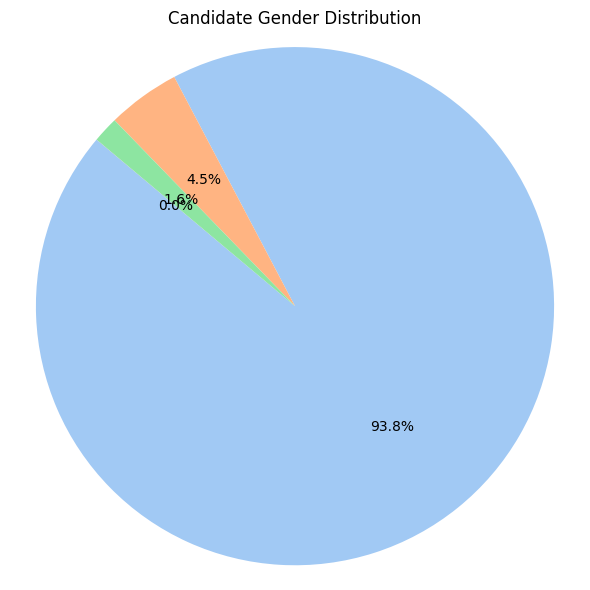

In [ ]:
# Candidate Gender Distribution.
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare gender distribution data.
gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

# Pie Chart.
plt.figure(figsize = (6, 6))
plt.pie(
    gender_counts['Count'],
    autopct = '%1.1f%%',
    startangle = 140,
    colors = sns.color_palette('pastel')
)

plt.title('Candidate Gender Distribution')
plt.axis('equal') # Equal aspect ratio ensures pie is a circle.
plt.tight_layout()
plt.show()

    Year  Avg_Candidates_Per_Seat
0   1977                36.708235
1   1978                19.384354
2   1979                12.312500
3   1980                39.305882
4   1982                11.676871
5   1983                15.200680
6   1984                 7.470085
7   1985                57.840000
8   1987                16.122449
9   1989                30.978824
10  1990                65.114198
11  1991                40.286396
12  1992                 4.931624
13  1993                41.716981
14  1994                20.061224
15  1995                53.206790
16  1996                39.681604
17  1997                 5.905983
18  1998                20.215625
19  1999                19.472789
20  2000                17.783951
21  2001                17.428571
22  2002                20.193548
23  2003                25.743478
24  2004                24.972789
25  2005                29.246914
26  2006                20.928571
27  2007                24.866005
28  2008      

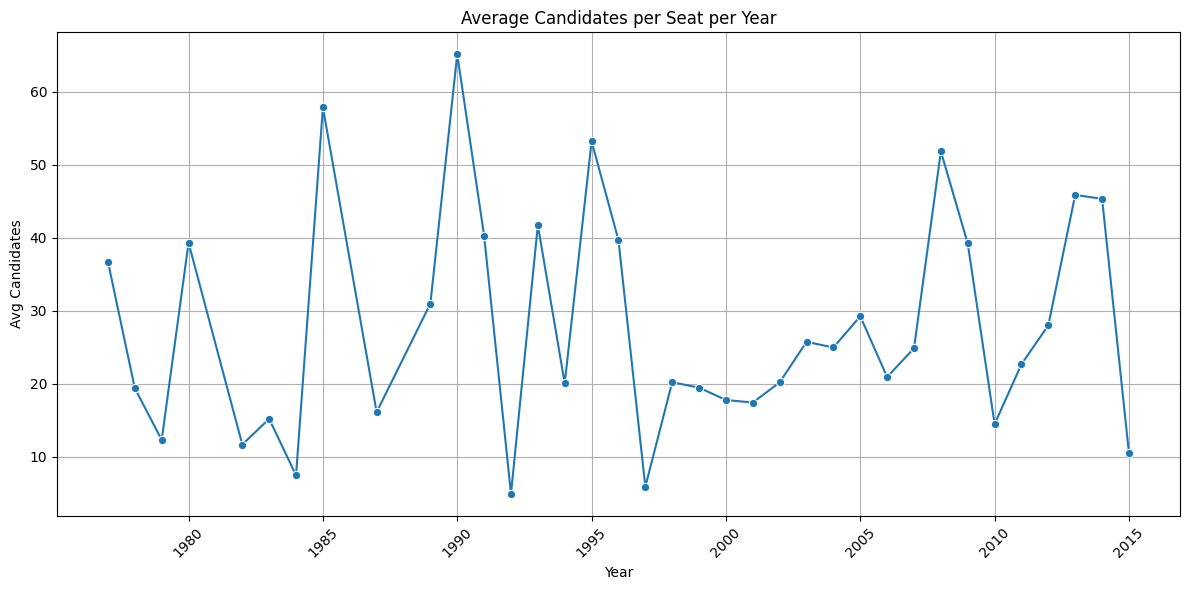

In [ ]:
# Average Candidates per seat per hour.

candidates_per_seat = df_vidhan.groupby(['year', 'ac_no'])['cand_name'].nunique()
avg_candidates_per_seat = candidates_per_seat.groupby('year').mean().reset_index()
avg_candidates_per_seat.columns = ['Year', 'Avg_Candidates_Per_Seat']
avg_candidates_per_columns = ['Year', 'Avg_Candidates_Per_Seat']
print(avg_candidates_per_seat)

# Line Plot.
plt.figure(figsize = (12, 6))
sns.lineplot(data = avg_candidates_per_seat, x = 'Year', y = 'Avg_Candidates_Per_Seat', marker = 'o')
plt.title('Average Candidates per Seat per Year')
plt.ylabel('Avg Candidates')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

    year  totvotpoll   electors  voter_turnout_percent
0   1977  59107891.0  226166275              26.134706
1   1978  27708972.0   85753182              32.312471
2   1979     94133.0     359101              26.213517
3   1980  64915667.0  258603200              25.102422
4   1982  20187665.0   52422974              38.509194
5   1983  21296499.0   66063231              32.236539
6   1984  12232502.0   31523449              38.804453
7   1985  86255868.0  312198536              27.628531
8   1987  25323833.0   63872512              39.647467
9   1989  49919785.0  186678633              26.741028
10  1990  57125442.0  213268107              26.785741
11  1991  57289242.0  203190207              28.194883
12  1992   1416408.0   13171851              10.753295
13  1993  41990796.0  167611922              25.052392
14  1994  25693484.0   75778249              33.906146
15  1995  46243622.0  164492560              28.112896
16  1996  71148520.0  237706787              29.931211
17  1997  

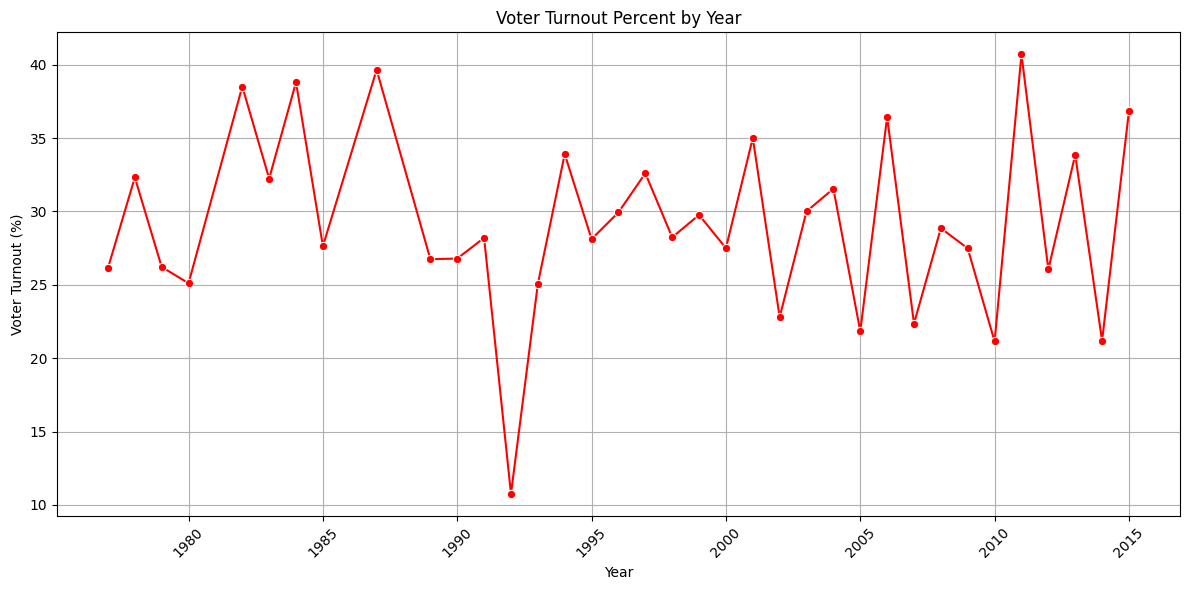

In [ ]:
# Voter turnout percent by Year.
# Step 1: Get Consistituency-level data (one row per seat per year).
constituency_turnout = (
    df_vidhan.groupby(['year', 'st_name', 'ac_no'])[['totvotpoll', 'electors']]
    .agg({'totvotpoll': 'max', 'electors': 'max'}) # use 'max' to avoid duplication.
    .reset_index()
)

# Step 2: Aggregate to year level.

yearly_turnout = constituency_turnout.groupby('year')[['totvotpoll', 'electors']].sum().reset_index()

# Step 3: Compute voter turnout %.

yearly_turnout['voter_turnout_percent'] = (yearly_turnout['totvotpoll'] / yearly_turnout['electors']) * 100
print(yearly_turnout)

# Step 4: Plot the corrected turnout.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.lineplot(data = yearly_turnout, x = 'year', y = 'voter_turnout_percent', marker = 'o', color = 'Red')
plt.title('Voter Turnout Percent by Year')
plt.ylabel('Voter Turnout (%)')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

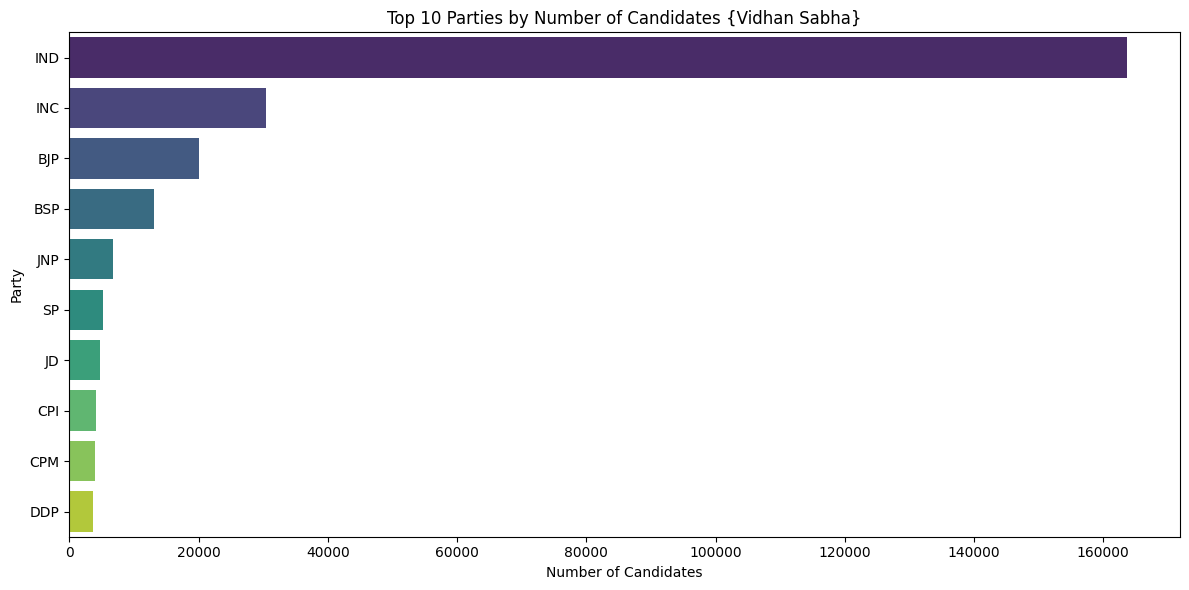

In [ ]:
# Step 1: Count Number of candidates per party and select top 10.
party_counts = df_vidhan['partyabbre'].value_counts().nlargest(10).reset_index()
party_counts.columns = ['Party', 'Candidate_Count']

# Step 2: Plot using hue and suppress legend.
plt.figure(figsize = (12, 6))
sns.barplot(
    data = party_counts,
    x = 'Candidate_Count',
    y = 'Party',
    hue = 'Party', # match hue to y-axis.
    dodge = False, # ensure bars align correctly.
    palette = 'viridis',
    legend = False # hide the redundant legend.
)

plt.title('Top 10 Parties by Number of Candidates {Vidhan Sabha}')
plt.ylabel('Party')
plt.xlabel('Number of Candidates')
plt.tight_layout()
plt.show()

In [ ]:
winners_df = df_vidhan.loc[df_vidhan.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

# Display the top winners.
print(winners_df[winners_df['st_name'] == 'Gujarat'][['st_name', 'year','ac_name', 'cand_name', 'partyabbre', 'totvotpoll']]
  .sort_values(by = 'year', ascending = False)
  .head(10))

## Omit [winners_df['st_name] == 'Gujarat] if you want result at national level.


       st_name  year        ac_name                            cand_name  \
84523  Gujarat  2012         Kamrej    Pansheriya Prafulbhai Chhaganbhai   
84615  Gujarat  2012     Surat West         Kishorbhai Ratilal Vankawala   
84609  Gujarat  2012       Katargam         Vanani Nanubhai Bhagavanbhai   
84600  Gujarat  2012         Majura            Sanghvi Harsh Rameshkumar   
84593  Gujarat  2012          Udhna                   Narottambhai Patel   
84585  Gujarat  2012       Limbayat        Patil Sangitaben Rajendrabhai   
84565  Gujarat  2012         Karanj       Kachhadiya Janakbhai Manjibhai   
84560  Gujarat  2012  Varachha Road  Kanani Kishorbhai Shivabhai (Kumar)   
84555  Gujarat  2012    Surat North         Choksi Ajaykumar Jashvantlal   
84515  Gujarat  2012         Mandvi          Vasava Parbhubhai Nagarbhai   

      partyabbre  totvotpoll  
84523        BJP    126032.0  
84615        BJP     99099.0  
84609        BJP     88604.0  
84600        BJP    103577.0  
84593   

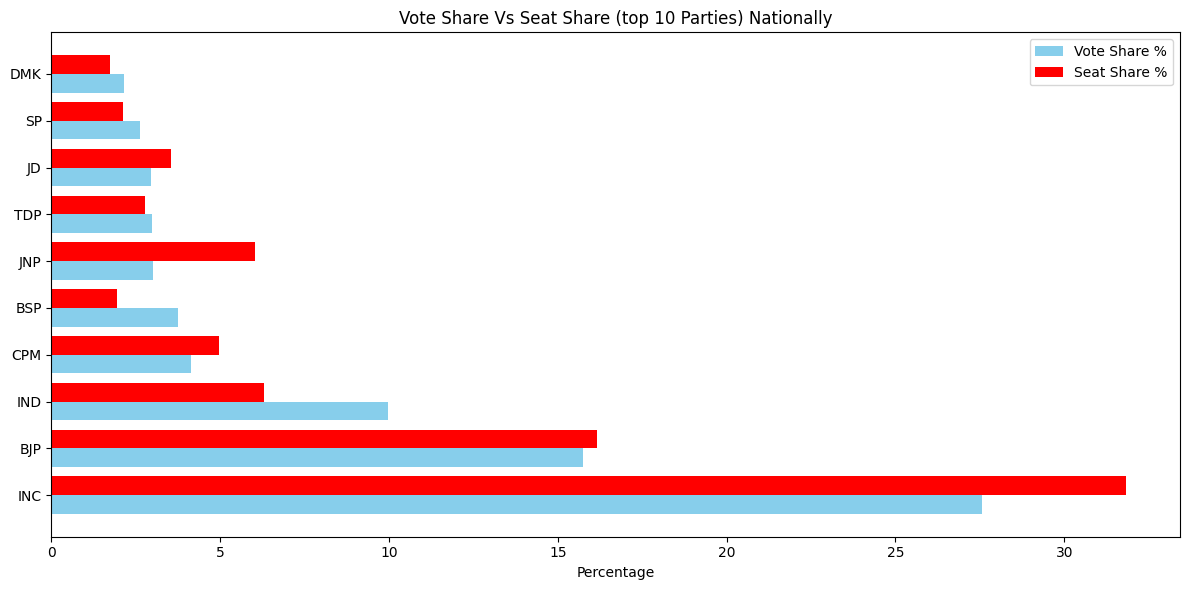

In [ ]:
# Step 1: Total votes by party (Vote Share).
party_votes = df_vidhan.groupby('partyabbre')['totvotpoll'].sum()
total_votes = party_votes.sum()
party_vote_share = (party_votes / total_votes * 100).reset_index()
party_vote_share.columns = ['Party', 'Vote_Share']

# Step 2: Total winners by party (Seat Share)
party_seats = winners_df['partyabbre'].value_counts(normalize = True) * 100
party_seat_share = party_seats.reset_index()
party_seat_share.columns = ['Party', 'Seat_Share']

# Step 3: Merge vote share and seat share.
share_df = pd.merge(party_vote_share, party_seat_share, on = 'Party')

# Step 4: Top  parties by vote share.
top_parties = share_df.sort_values('Vote_Share', ascending = False).head(10)

# Step 5: Plot.
plt.figure(figsize = (12, 6))
bar_width = 0.4
x = range(len(top_parties))

plt.barh(x, top_parties['Vote_Share'], height = bar_width, label = 'Vote Share %', color = 'Skyblue')
plt.barh([p + bar_width for p in x], top_parties['Seat_Share'], height = bar_width, label = 'Seat Share %', color = 'Red')

plt.yticks([p + bar_width / 2 for p in x], top_parties['Party'])
plt.xlabel('Percentage')
plt.title('Vote Share Vs Seat Share (top 10 Parties) Nationally')
plt.legend()
plt.tight_layout()
plt.show()

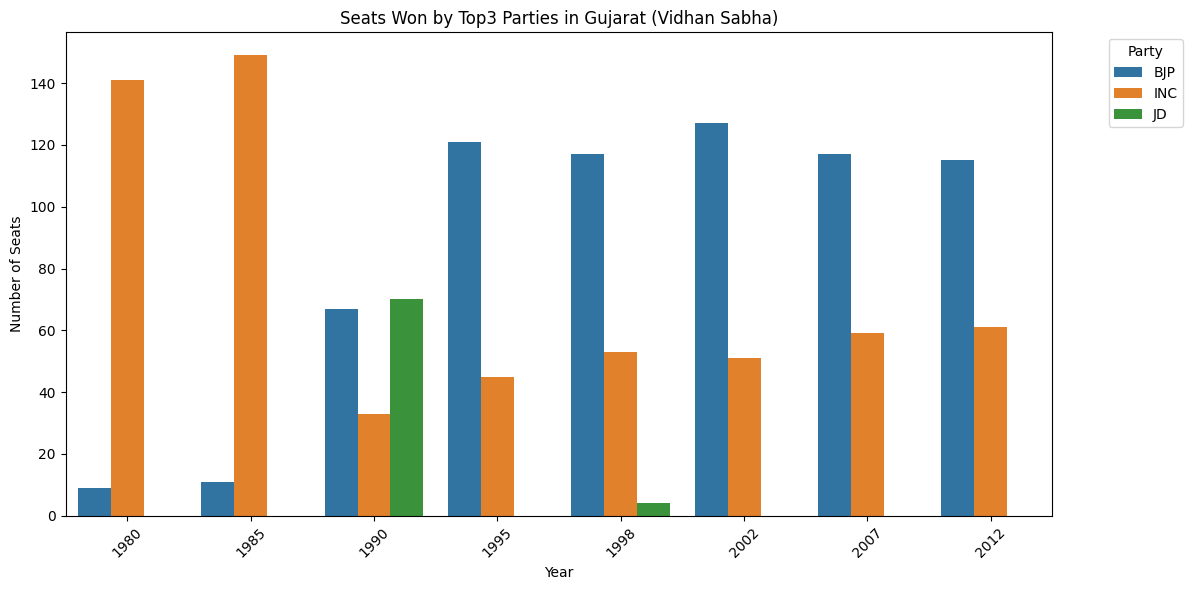

In [ ]:
# 1. Filter for Gujarat Only.
winners_gujarat = winners_df[winners_df['st_name'] == 'Gujarat'].copy()

# 2. Find top 3 parties in Gujarat by total seats won.
top_3_parties = winners_gujarat['partyabbre'].value_counts().nlargest(3).index.tolist()

# 3. Filter to only those top 3 parties.
winners_gujarat_top3 = winners_gujarat[winners_gujarat['partyabbre'].isin(top_3_parties)]

# 4. Seats won per year by party.
party_seats_year = (
    winners_gujarat_top3.groupby(['year', 'partyabbre']).size()
    .reset_index(name = 'seats')
)

# 5. Plot: Seats Won.
plt.figure(figsize = (12, 6))
sns.barplot(data = party_seats_year, x = 'year', y = 'seats', hue = 'partyabbre')
plt.title('Seats Won by Top3 Parties in Gujarat (Vidhan Sabha)')
plt.ylabel('Number of Seats')
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.legend(title = 'Party', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-30-4284623602.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = 'Party', bbox_to_anchor = (1.05, 1), loc = 'upper left')


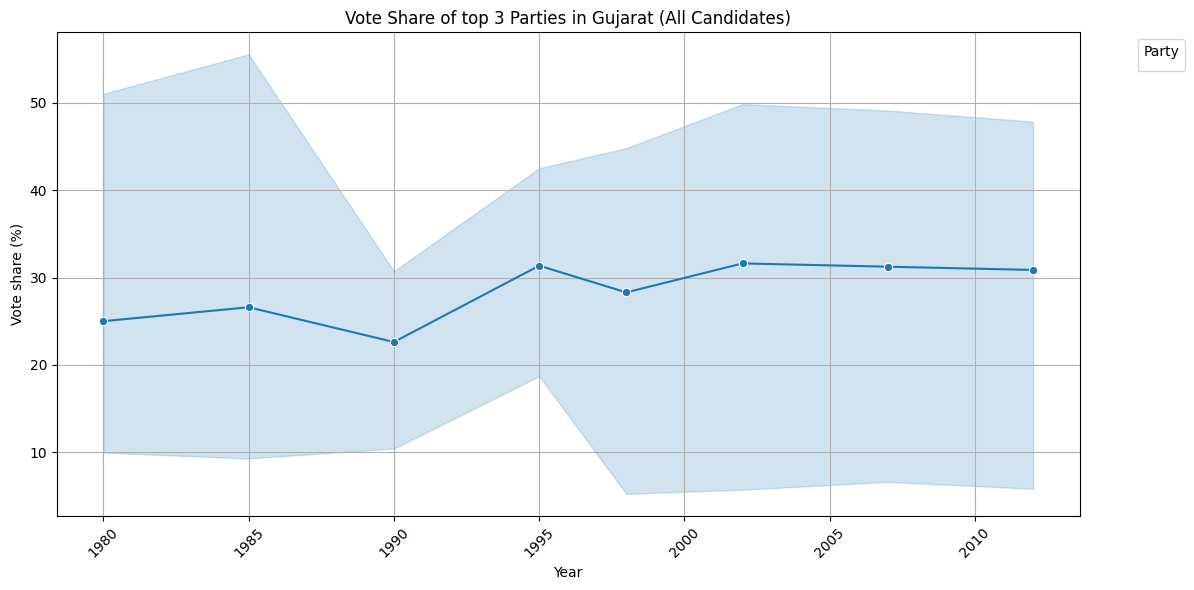

In [ ]:
# Party Vote Share trend (Gujarat).
# Step 1: Filter_Gujarat data

gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

# Step 2: Total votes polled per party per year (including all candidates)
party_votes = (
    gujarat_df.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index()
)

# Step 3: Total votes polled overall per year.
total_votes_per_year = (
    gujarat_df.groupby('year')['totvotpoll']
    .sum()
    .reset_index()
    .rename(columns = {'totvotpoll' : 'total_votes'})
)

# Step 4: Merge and Compute vote share.
party_vote_share = pd.merge(party_votes, total_votes_per_year, on = 'year')
party_vote_share['vote_share_percent'] = (party_vote_share['totvotpoll'] / party_vote_share['total_votes']) * 100

# Step 5: Identify top 3 parties by total votes in Gujarat.
top_parties = (
    gujarat_df.groupby('partyabbre')['totvotpoll']
    .sum()
    .sort_values(ascending = False)
    .head(3)
    .index.tolist()
)

# Step 6: Filter only top 3 parties.
top_vote_share = party_vote_share[party_vote_share['partyabbre'].isin(top_parties)]

# Step 7: Plot vote share trend over time.
plt.figure(figsize = (12, 6))
sns.lineplot(
    data = top_vote_share,
    x = 'year',
    y = 'vote_share_percent',
    marker = 'o'
)
plt.title('Vote Share of top 3 Parties in Gujarat (All Candidates)')
plt.xlabel('Year')
plt.ylabel('Vote share (%)')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend(title = 'Party', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

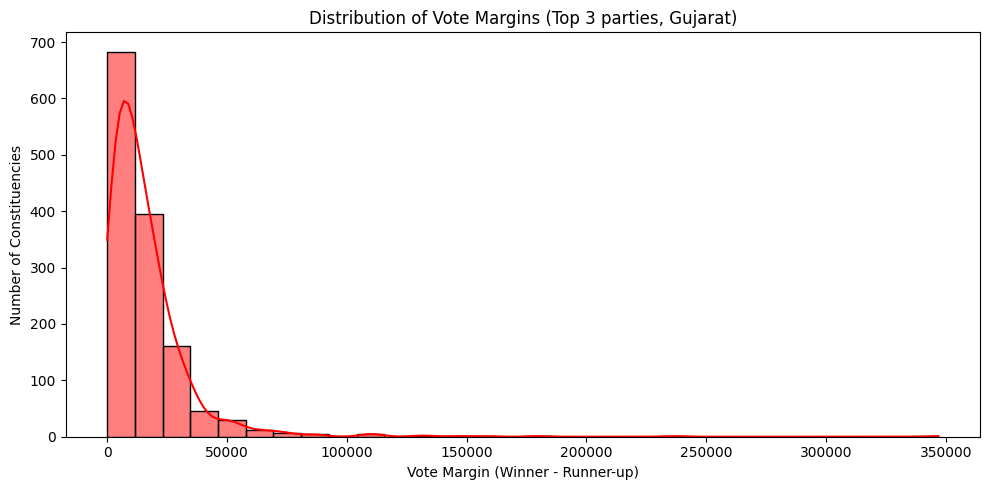

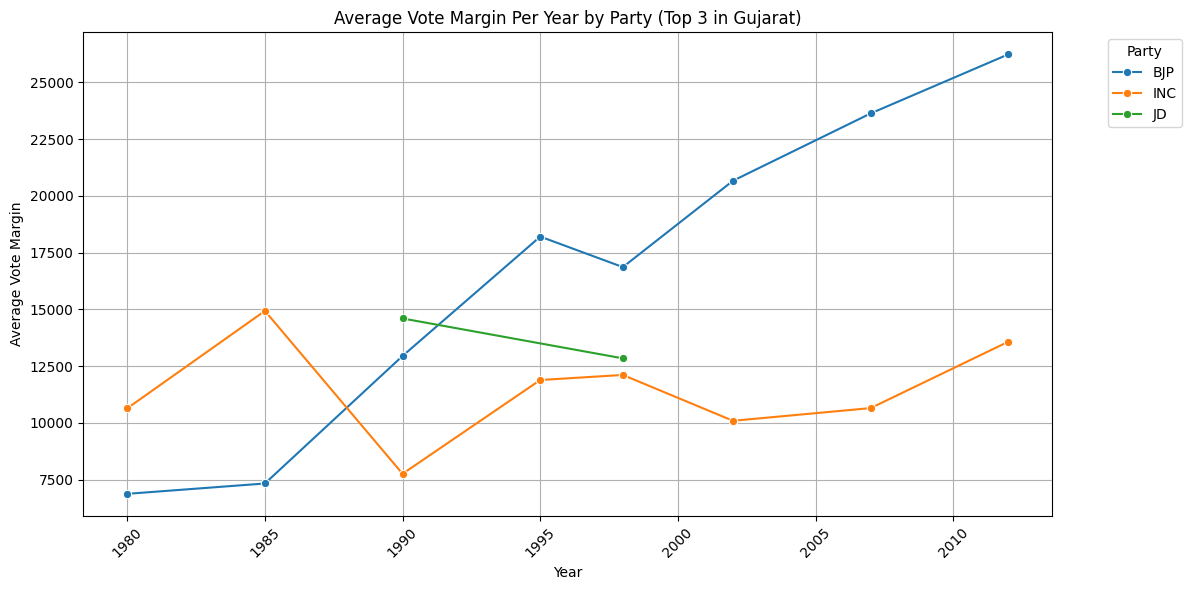

Outliers Years in Vote Margin trends (Top 3 Parties, Gujarat):
    year party   vote_margin
16  2012   BJP  26236.504348
14  2007   BJP  23632.948718
12  2002   BJP  20666.952756
7   1995   BJP  18206.305785
9   1998   BJP  16862.564103
1   1980   INC  10640.100000
13  2002   INC  10091.764706
5   1990   INC   7757.242424
2   1985   BJP   7329.909091
0   1980   BJP   6874.333333


In [ ]:
# Ensure vote_share_percent_exists.
df_vidhan['vote_share_percent'] = (df_vidhan['totvotpoll'] / df_vidhan['electors']) * 100

# Step 1: Filter Gujarat data.
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

# Step 2: Rank Candidates per seat.
gujarat_df['rank'] = gujarat_df.groupby(['year', 'ac_no'])['totvotpoll'].rank(method = 'first', ascending = False)

# Step 3: Extract  winners and runners-up.
winners = gujarat_df[gujarat_df['rank'] == 1].copy()
runners_up = gujarat_df[gujarat_df['rank'] == 2].copy()

# Step 4: Merge winners and runners-up to calculate vote margins.
merged = pd.merge(
    winners,
    runners_up,
    on = ['year', 'ac_no'],
    suffixes = ('_winner', '_runnerup')
)
merged['vote_margin'] = merged['totvotpoll_winner']- merged['totvotpoll_runnerup']

# Step 5: Identify top 3 parties by number of wins.
top_3_parties = winners['partyabbre'].value_counts().nlargest(3).index.tolist()

# Step 6: Filter to top 3 parties only.
merged_top3 = merged[merged['partyabbre_winner'].isin(top_3_parties)].copy()

# Step 7: Plot 1 - Histogram of vote margins.
plt.figure(figsize = (10, 5))
sns.histplot(merged_top3['vote_margin'], bins = 30, kde = True, color = 'red')
plt.title('Distribution of Vote Margins (Top 3 parties, Gujarat)')
plt.xlabel('Vote Margin (Winner - Runner-up)')
plt.ylabel('Number of Constituencies')
plt.tight_layout()
plt.show()

# Step 8: Average vote margin per year per party.
avg_margin_year_party = (
    merged_top3.groupby(['year', 'partyabbre_winner'])['vote_margin']
    .mean()
    .reset_index()
    .rename(columns = {'partyabbre_winner' : 'party'})
)

# Step 9: Line Plot of average margin over time.
plt.figure(figsize = (12, 6))
sns.lineplot(data = avg_margin_year_party, x = 'year', y = 'vote_margin', hue = 'party', marker = 'o')
plt.title('Average Vote Margin Per Year by Party (Top 3 in Gujarat)')
plt.xlabel('Year')
plt.ylabel('Average Vote Margin')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend(title = 'Party', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

# Step 10: Identify outlier years (high / low margins)
q1 = avg_margin_year_party['vote_margin'].quantile(0.25)
q3 = avg_margin_year_party['vote_margin'].quantile(0.75)
outliers = avg_margin_year_party[
    (avg_margin_year_party['vote_margin'] < q1) |
    (avg_margin_year_party['vote_margin'] > q3)
]

# Optional Display Outliers.
print("Outliers Years in Vote Margin trends (Top 3 Parties, Gujarat):")
print(outliers.sort_values(by = 'vote_margin', ascending = False))

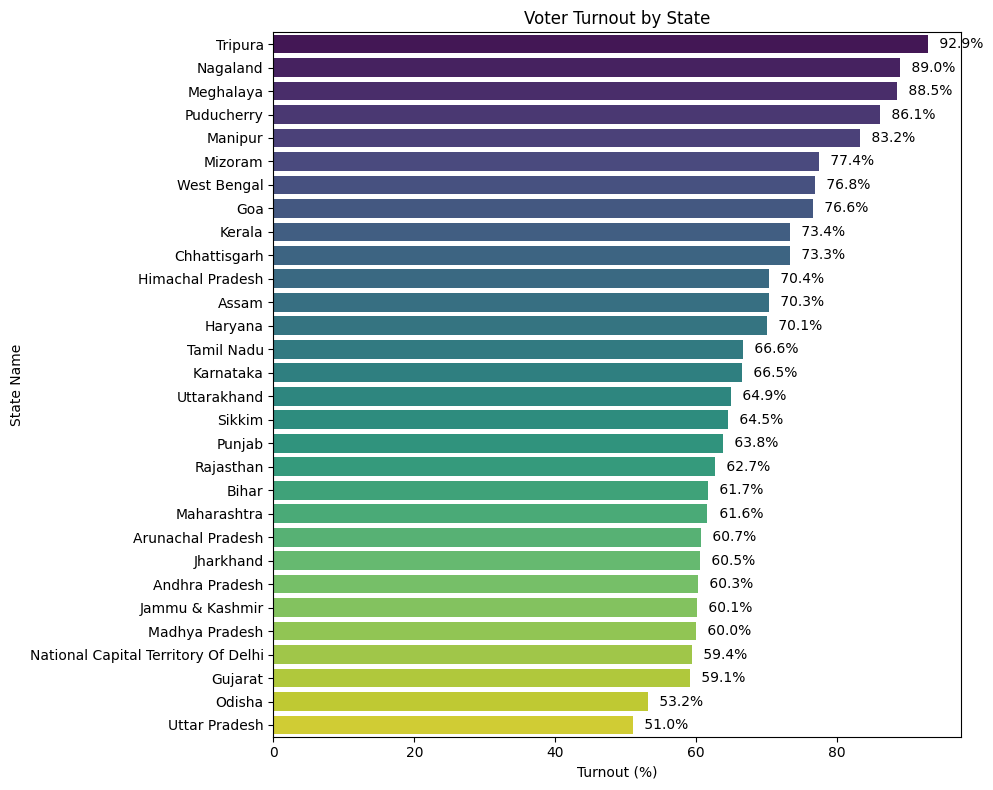

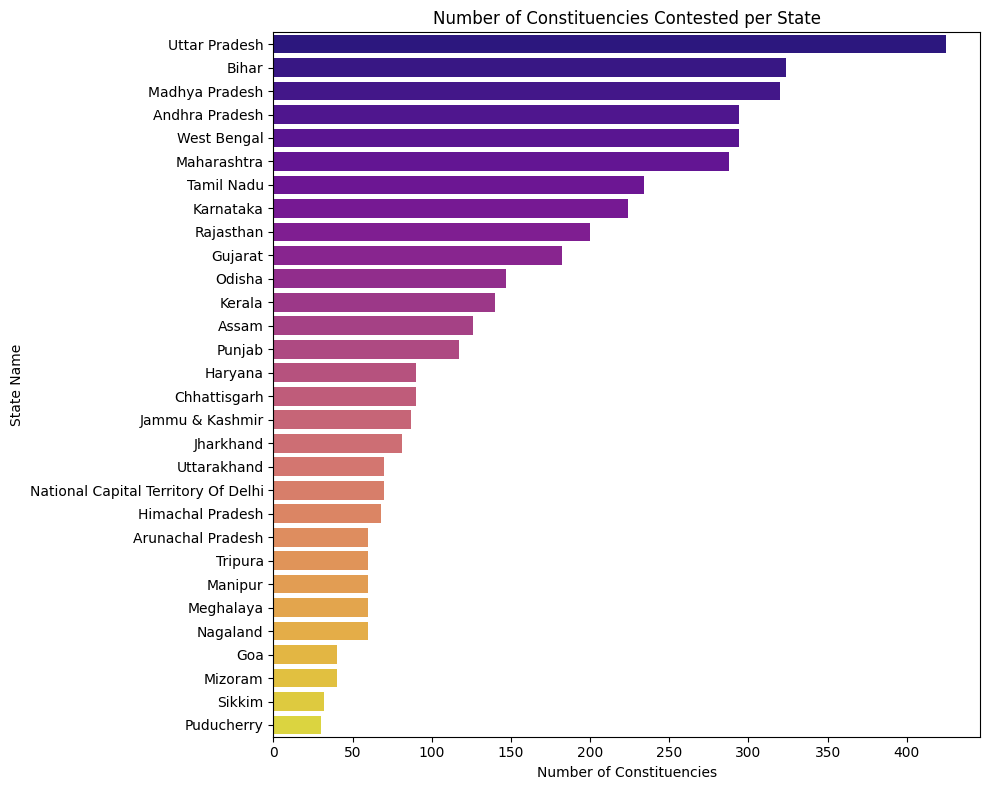

In [ ]:
# Step 1:  Get Constituency-level totals (one row per seat)
constituency_turnout = (
    df_vidhan.groupby(['st_name', 'year', 'ac_no'])[['totvotpoll', 'electors']]
    .agg({'totvotpoll': 'sum', 'electors' : 'max'}) # max electors per seat, sum of votes
    .reset_index()
)

# Step 2: Aggregate to state level.
state_turnout = (
    constituency_turnout.groupby('st_name')[['totvotpoll', 'electors']]
    .sum()
    .assign(voter_turnout_percent = lambda x: (x['totvotpoll'] / x['electors']) * 100)
    .sort_values('voter_turnout_percent', ascending = False)['voter_turnout_percent']
)

# Step 3: Number of Constituencies per state.
state_constituencies = df_vidhan.groupby('st_name')['ac_no'].nunique().sort_values(ascending = False)

# Step 4: Set custom font name if needed (Optional).
font_name = 'DejaVu Sans'

# Plot 1: Voter Turnout by State (horizontal bar).
plt.figure(figsize = (10, 8))
ax1 = sns.barplot(
    x = state_turnout.values,
    y = state_turnout.index,
    hue = state_turnout.index, # explicitly assign hue.
    palette = 'viridis',
    legend = False
)
plt.title('Voter Turnout by State', fontdict = {'fontname': font_name})
plt.xlabel('Turnout (%)', fontdict = {'fontname' : font_name})
plt.ylabel('State Name', fontdict = {'fontname': font_name})
plt.xticks(fontname = font_name)
plt.yticks(fontname = font_name)

for p in ax1.patches:
  ax1.annotate(f'{p.get_width(): .1f}%', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
               ha = 'left', va = 'center', fontsize = 10, color = 'black')
plt.tight_layout()
plt.show()

# Plot 2: Number of constituencies per state.
plt.figure(figsize = (10, 8))
ax2 = sns.barplot(
    x = state_constituencies.values,
    y = state_constituencies.index,
    hue = state_constituencies.index, # explicitly assign hue.
    palette = 'plasma',
    legend = False
)
plt.title('Number of Constituencies Contested per State', fontdict = {'fontname': font_name})
plt.xlabel('Number of Constituencies', fontdict = {'fontname' : font_name})
plt.ylabel('State Name', fontdict = {'fontname': font_name})
plt.xticks(fontname = font_name)
plt.yticks(fontname = font_name)

for p in ax2.patches:
  ax1.annotate(f'{p.get_width(): .1f}%', (p.get_width() + 1, p.get_y() + p.get_height() / 2),
               ha = 'left', va = 'center', fontsize = 10, color = 'black')
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Count Candidates by gender.
gender_participation = df_lok['cand_sex'].value_counts().reset_index()
gender_participation.columns = ['Gender', 'Number_of_Candidates']

# Step 2: Identify winners (top vote-getter in each seat per year)
df_lok['rank'] = df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].rank(method = 'first', ascending = False)
winners_lok = df_lok[df_lok['rank'] == 1].copy()

# Step 3: Count winners by gender.
gender_wins = winners_lok['cand_sex'].value_counts().reset_index()
gender_wins.columns = ['Gender', 'Number_of_Winners']

# Step 4: Merge participation and performance.
gender_analysis = pd.merge(
    gender_participation,
    gender_wins,
    on = 'Gender',
    how = 'left'
).fillna(0)

# Step 5: Compute win rate.
gender_analysis['Win_Rate (%)'] = (
    gender_analysis['Number_of_Winners'] / gender_analysis['Number_of_Candidates']
) * 100

# Step 6: Display the results.
print("\nGender-Based Participation and Performance (Lok Sabha):")
print(gender_analysis.sort_values(by = 'Number_of_Candidates', ascending = False))


Gender-Based Participation and Performance (Lok Sabha):
  Gender  Number_of_Candidates  Number_of_Winners  Win_Rate (%)
0      M                 68885             5479.0      7.953836
1      F                  3648              455.0     12.472588
2      U                   542                0.0      0.000000
3      O                     6                0.0      0.000000


# Implications


*   Political parties need to field more women - they are clearly electable


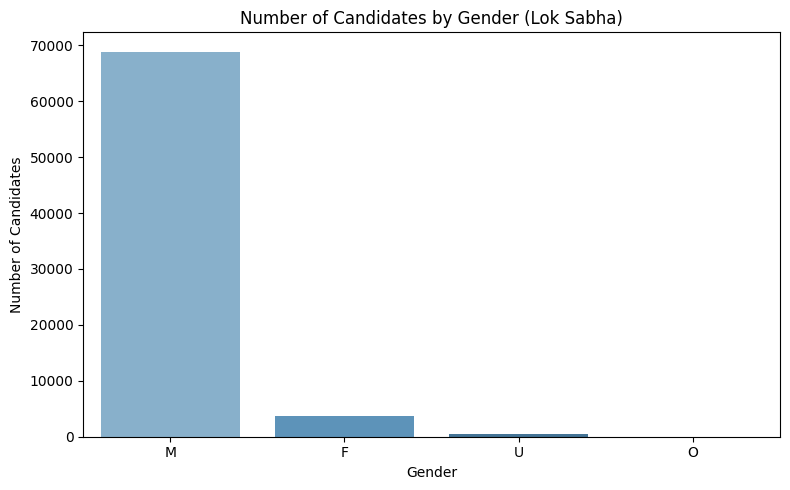

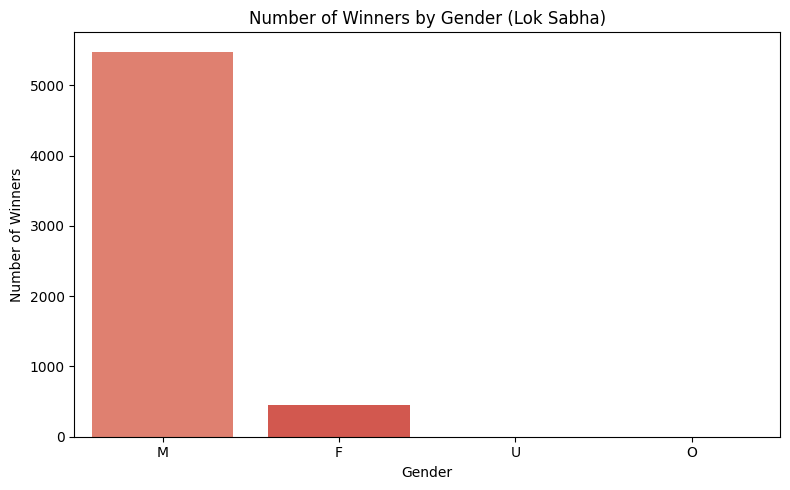

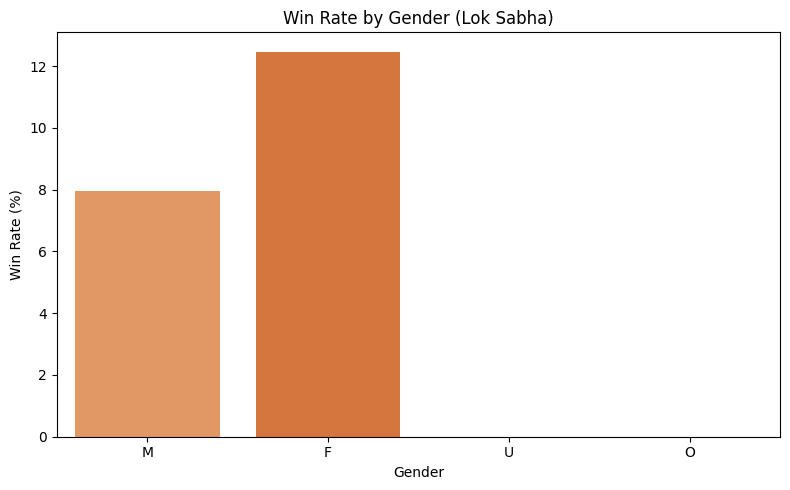

In [ ]:
# Plot 1: Number of Candidates by Gender.
plt.figure(figsize = (8, 5))
sns.barplot(
    data = gender_analysis,
    x = 'Gender',
    y = 'Number_of_Candidates',
    hue = 'Gender',
    palette = 'Blues_d',
    legend = False
)
plt.title('Number of Candidates by Gender (Lok Sabha)')
plt.ylabel('Number of Candidates')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

# Plot 2: Number of Winners by Gender.
plt.figure(figsize = (8, 5))
sns.barplot(
        data = gender_analysis,
    x = 'Gender',
    y = 'Number_of_Winners',
    hue = 'Gender',
    palette = 'Reds_d',
    legend = False
)
plt.title('Number of Winners by Gender (Lok Sabha)')
plt.ylabel('Number of Winners')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

# Plot 3: Win Rate by Gender.
plt.figure(figsize = (8, 5))
sns.barplot(
        data = gender_analysis,
    x = 'Gender',
    y = 'Win_Rate (%)',
    hue = 'Gender',
    palette = 'Oranges_d',
    legend = False
)
plt.title('Win Rate by Gender (Lok Sabha)')
plt.ylabel('Win Rate (%)')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


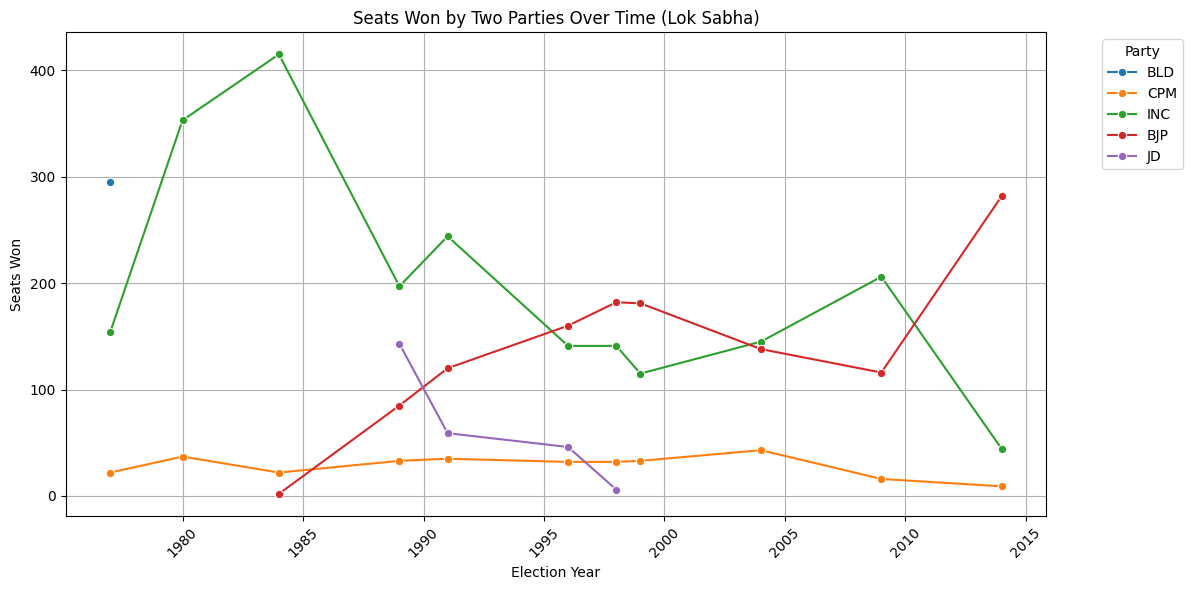

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get true winners.
winner_idx = df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].idxmax()
winners = df_lok.loc[winner_idx].copy()

# Step 2: Seats won per party per year.
party_performance = winners.groupby(['year', 'partyabbre']).size().reset_index(name = 'seats_won')

# Step 3: Top 5 parties by total seats won.
top_parties = (
    party_performance.groupby('partyabbre')['seats_won']
    .sum()
    .nlargest(5)
    .index.tolist()
)

# Step 4: Filter to top parties only.
top_party_performance = party_performance[party_performance['partyabbre'].isin(top_parties)]

# Step 5: Plot.
plt.figure(figsize = (12, 6))
sns.lineplot(
    data = top_party_performance,
    x = 'year',
    y = 'seats_won',
    hue = 'partyabbre',
    marker = 'o'
)
plt.title('Seats Won by Two Parties Over Time (Lok Sabha)')
plt.xlabel('Election Year')
plt.ylabel('Seats Won')
plt.grid(True)
plt.xticks(rotation = 45)
plt.legend(title = 'Party', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

In [ ]:
## Step 2: Total votes polled in each year.

# What is Gini Coefficient?????

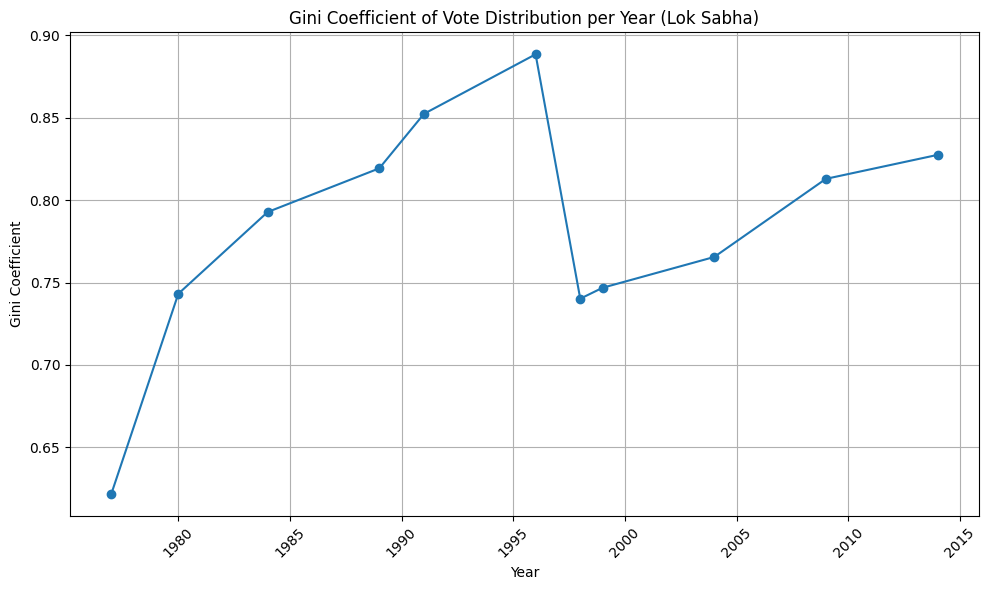

In [ ]:
# Step 1: Compute Gini Coefficient Function.
def gini(array):
  #### Compute Gini coefficient of a numpy array.####
    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array)
    return (2. *np.sum((np.arange(1, n + 1) * array)) / (n * cumulative[-1]) - (n + 1) / n)

# Step 2: Calculate Gini for vote distribution across all candidates.
votes = df_lok['totvotpoll'].values
gini_overall = gini(votes)

# Step 3: Compute Gini for each election year.
gini_yearwise = (
    df_lok.groupby('year')['totvotpoll']
    .apply(lambda x: gini(x.values))
    .reset_index(name = 'gini_coefficient')
)

# Step 4: Plot Gini coefficient over time.
plt.figure(figsize = (10, 6))
plt.plot(gini_yearwise['year'], gini_yearwise['gini_coefficient'], marker = 'o', linestyle = '-')
plt.title('Gini Coefficient of Vote Distribution per Year (Lok Sabha)')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

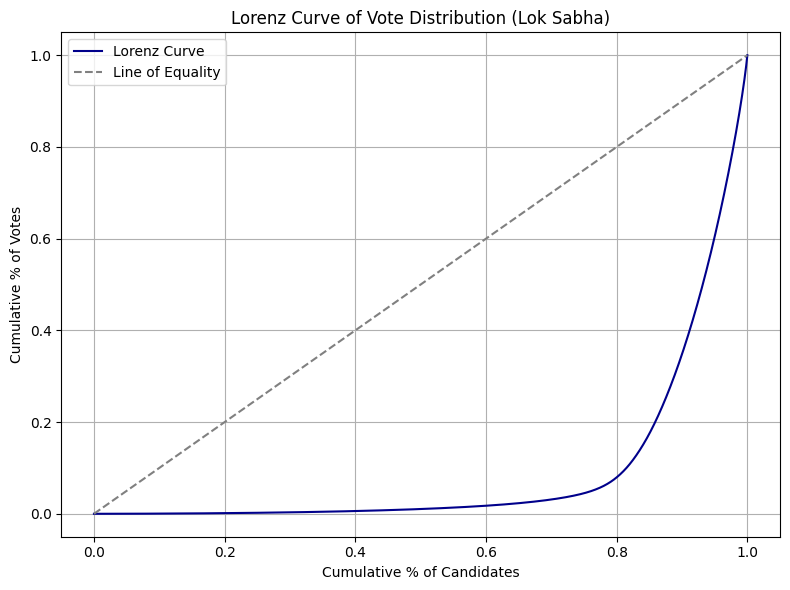

In [ ]:
# Step 1: Prepare sorted vote data (Only non-zero votes).
votes = df_lok['totvotpoll'].dropna()
votes = votes[votes > 0].sort_values().values

# Step 2: Compute cumulative share of candidates and votes.
cum_votes = np.cumsum(votes)
cum_votes_percent = cum_votes / cum_votes[-1]
cum_candidates_percent = np.arange(1, len(votes) + 1) / len(votes)

# Step 3: Plot lorenz Curve.
plt.figure(figsize = (8, 6))
plt.plot(cum_candidates_percent, cum_votes_percent, label = 'Lorenz Curve', color = 'darkblue')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'grey', label = 'Line of Equality')

plt.title('Lorenz Curve of Vote Distribution (Lok Sabha)')
plt.xlabel('Cumulative % of Candidates')
plt.ylabel('Cumulative % of Votes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# Step 1: Clean and Calculate Vote Share Percent.
df_lok['totvotpoll'] = df_lok['totvotpoll'].fillna(0)
df_lok['electors'] = df_lok['electors'].replace(0, np.nan) # avoid division by zero.
df_lok['vote_share_percent'] = (df_lok['totvotpoll'] / df_lok['electors']) * 100

# Step 2: Drop NaNs and extreme outliers (optional but recommend)
vote_shares = df_lok['vote_share_percent'].dropna()
vote_shares = vote_shares[vote_shares <= 100] # Keep valid percentage.

# Step 3: Compute Skewness and Kurtosis.
vote_skewness = skew(vote_shares)
vote_kurtosis = kurtosis(vote_shares)

# Step 4: Display Results.
print(f'Skewness of Vote Share Distribution: {vote_skewness:.4f}')
print(f'Kurtosis of Vote Share Distribution: {vote_kurtosis:.4f}')

Skewness of Vote Share Distribution: 2.2187
Kurtosis of Vote Share Distribution: 4.0478


In [ ]:
# Skewness and Kurtosis by election year.
# Year wise analysis.
summary = df_lok.groupby('year')['vote_share_percent'].apply(
    lambda x: pd.Series({
        'Skewness' : skew(x.dropna()),
        'kurtosis' : kurtosis(x.dropna())
    })
).reset_index()

print(summary)

    year   level_1  vote_share_percent
0   1977  Skewness            0.869836
1   1977  kurtosis           -0.487988
2   1980  Skewness            1.733725
3   1980  kurtosis            1.986911
4   1984  Skewness            1.914409
5   1984  kurtosis            2.355135
6   1989  Skewness            2.136984
7   1989  kurtosis            3.499113
8   1991  Skewness            2.810178
9   1991  kurtosis            7.671801
10  1996  Skewness            3.636894
11  1996  kurtosis           13.781332
12  1998  Skewness            1.389376
13  1998  kurtosis            0.551309
14  1999  Skewness            1.446932
15  1999  kurtosis            0.728694
16  2004  Skewness            1.884250
17  2004  kurtosis            2.647415
18  2009  Skewness            2.530822
19  2009  kurtosis            5.828738
20  2014  Skewness            2.496316
21  2014  kurtosis            5.303818


In [ ]:
# Party-Wise Skewness & Kurtosis.
from scipy.stats import skew, kurtosis

# Step 2: Total votes per party per year.
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name = 'party_votes')
)

# Step 3: Total votes cast per year.
total_votes = (
    df_lok.groupby('year')['totvotpoll']
    .sum()
    .reset_index(name = 'total_votes')
)

# Step 4: Merge and Calculate Vote Share.'
party_votes = pd.merge(party_votes, total_votes, on = 'year')
party_votes['vote_share_percent'] = (party_votes['party_votes'] / party_votes['total_votes']) * 100

# Step 5: Filter parties with votes in at least 3 years.
party_years = party_votes['partyabbre'].value_counts()
eligible_parties = party_years[party_years >= 3].index
filtered = party_votes[party_votes['partyabbre'].isin(eligible_parties)]

# Step 6: Group by party and compute skewness & kurtosis.
summary_stats = filtered.groupby('partyabbre')['vote_share_percent'].agg(
    skewness = lambda x: skew(x),
    kurtosis = lambda x: kurtosis(x)
).reset_index().sort_values('skewness', ascending = False)

# Step 7: Display the top skewed parties.
print('Most Right-Skewed Parties:')
print(summary_stats.head())

print("\n Most Left-Skewed Parties")
print(summary_stats.tail())

Most Right-Skewed Parties:
    partyabbre  skewness  kurtosis
162     SAD(M)  2.174604  2.915587
172        SSD  2.108498  3.223395
96          JP  1.778669  1.181883
5         ABJS  1.589929  0.862739
90         JKP  1.561140  1.392361

 Most Left-Skewed Parties
    partyabbre  skewness  kurtosis
79        INLD -0.982702 -0.772453
161        SAD -1.027178  1.301219
57         CPM -1.145262  0.578997
117        MRP -1.177393 -0.260929
170         SP -1.407391  1.033443


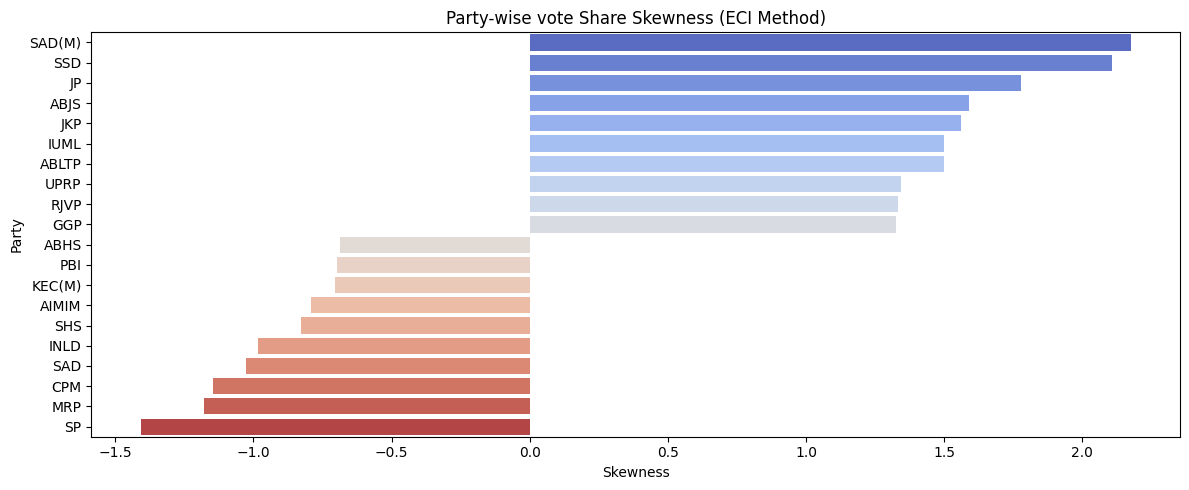

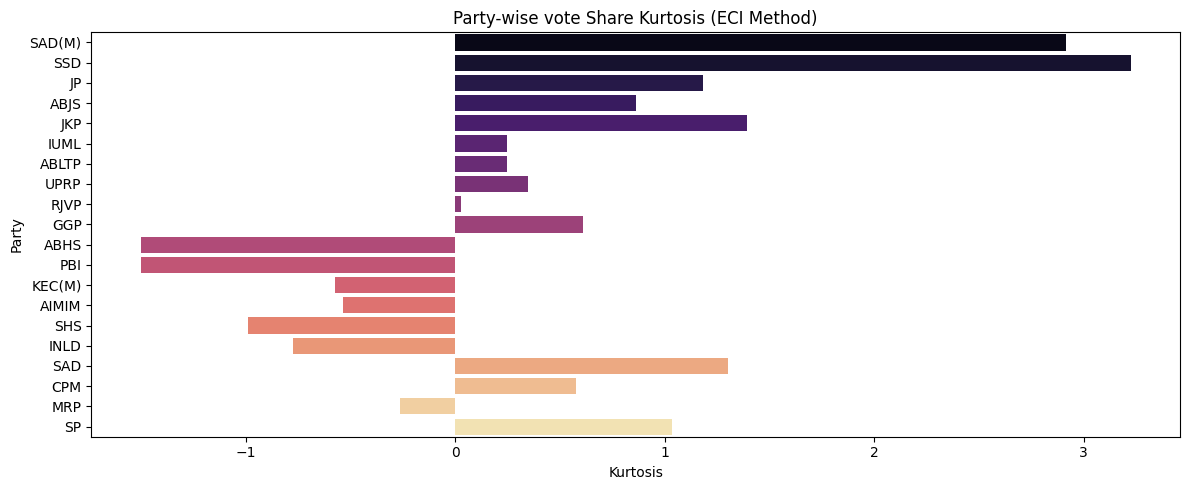

In [ ]:
# Select top 10 and bottom 10 parties for plotting.
plot_data = pd.concat([summary_stats.head(10), summary_stats.tail(10)])

# Plot 1: Skewness.
plt.figure(figsize = (12, 5))
sns.barplot(
    data = plot_data,
    x = 'skewness',
    y = 'partyabbre',
    hue = 'partyabbre',
    palette = 'coolwarm',
    legend = False
)
plt.title('Party-wise vote Share Skewness (ECI Method)')
plt.xlabel('Skewness')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

# Plot 2: Kurtosis.
plt.figure(figsize = (12, 5))
sns.barplot(
    data = plot_data,
    x = 'kurtosis',
    y = 'partyabbre',
    hue = 'partyabbre',
    palette = 'magma',
    legend = False
)
plt.title('Party-wise vote Share Kurtosis (ECI Method)')
plt.xlabel('Kurtosis')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

##Are the average vote shares significantly different between states

#f_stats = the F-value (used in ANOVA)


*   p_value <= tells us if the result is statistically significant

*  if p < 0.05, then yes - vote share varies significantly by state.



if p < 0.05, then yes - vote share varies significantly by state.

ANOVA F-statistic: 14.8951
P-value: 2.0403e-35
✅ BJP's vote shares significantly differ across states.


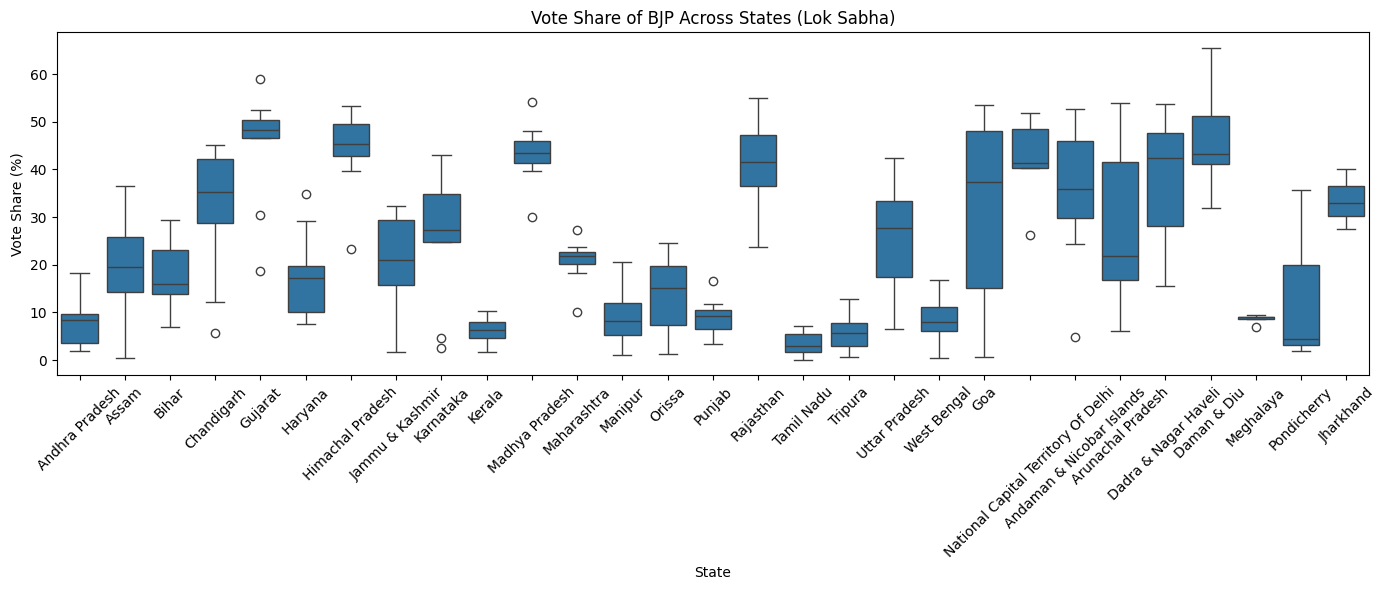

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean data
df_lok['totvotpoll'] = df_lok['totvotpoll'].fillna(0)

# Step 2: Choose a party
target_party = 'BJP' # you can change to INC, AAP, etc.

# Step 3: Total votes for the party per state per year
party_votes = (
    df_lok[df_lok['partyabbre'] == target_party]
    .groupby(['year', 'st_name'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 4: Total votes polled in each state per year
total_votes = (
    df_lok.groupby(['year', 'st_name'])['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 5: Merge and calculate ECI-style vote share
merged = pd.merge(party_votes, total_votes, on=['year', 'st_name'])
merged['vote_share_percent'] = (merged['party_votes'] / merged['total_votes']) * 100

# Step 6: Filter out states with too few observations (e.g., < 3 elections)
state_counts = merged['st_name'].value_counts()
eligible_states = state_counts[state_counts >= 3].index
filtered = merged[merged['st_name'].isin(eligible_states)]

# Step 7: Group vote shares by state
grouped_data = filtered.groupby('st_name')['vote_share_percent'].apply(list)

# Step 8: Run ANOVA
f_stat, p_value = f_oneway(*grouped_data)

# Step 9: Results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")
if p_value < 0.05:
    print(f"✅ {target_party}'s vote shares significantly differ across states.")
else:
    print(f"❌ No significant difference in {target_party}'s vote shares across states.")

# Step 10: Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered, x='st_name', y='vote_share_percent')
plt.title(f"Vote Share of {target_party} Across States (Lok Sabha)")
plt.xlabel('State')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#This runs a two-sample t-test:

- Compares average vote share of ruling vs. opposition.
equal_var=False means we're allowing that the two groups might have different variances (which is often true in elections).

Summary

- Compares BJP's national vote share vs. opposition parties.
- Tells you if BJP performs significantly better, or if the difference is just due to chance.
## - Very useful for understanding electoral dominance.

T-statistic: 2.9276
P-value: 7.4741e-03
🟢 Significant difference in ECI-style vote shares between ruling and opposition parties.


/tmp/ipython-input-44-2057634115.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x='group', y='vote_share_percent', palette='Set2')


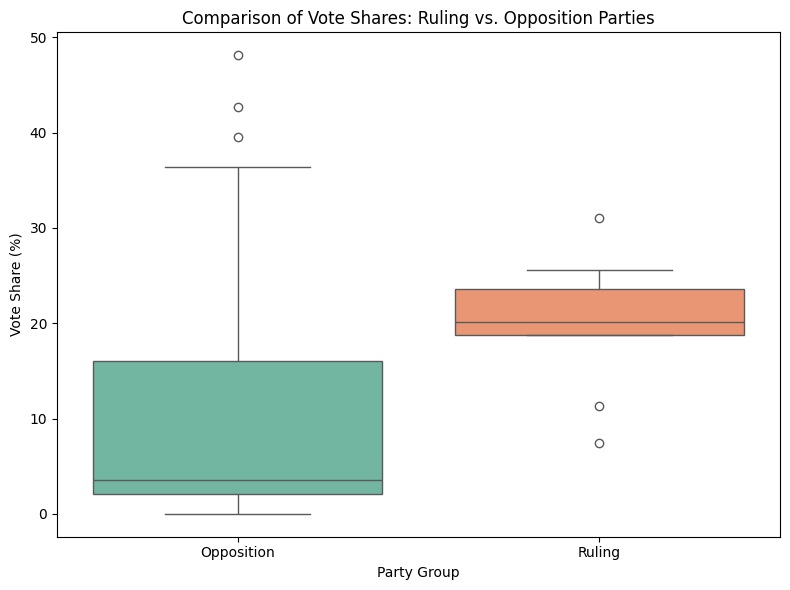

In [ ]:
# Ruling vs Opposition Comparison
from scipy.stats import ttest_ind

# Step 1: Define ruling and opposition parties
ruling_party = 'BJP'
opposition_parties = ['INC', 'DMK', 'SP', 'BSP', 'AITC'] # Add more if needed

# Step 2:
df_lok['totvotpoll'] = df_lok['totvotpoll'].fillna(0)

# Step 3: Total votes for each party per year
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 4: Total national votes per year
total_votes = (
    df_lok.groupby(['year'])['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 5: Merge to compute ECI-style vote share
party_votes = pd.merge(party_votes, total_votes, on='year')
party_votes['vote_share_percent'] = (party_votes['party_votes'] / party_votes['total_votes']) * 100

# Step 6: Create ruling vs opposition group column
party_votes['group'] = party_votes['partyabbre'].apply(
    lambda x: 'Ruling' if x == ruling_party else ('Opposition' if x in opposition_parties else 'Other')
)

# Step 7: Filter to just ruling vs opposition
filtered = party_votes[party_votes['group'].isin(['Ruling', 'Opposition'])]

# Step 8: Prepare data for t-test
ruling_shares = filtered[filtered['group'] == 'Ruling']['vote_share_percent']
opposition_shares = filtered[filtered['group'] == 'Opposition']['vote_share_percent']

# Step 9: Run t-test
t_stat, p_value = ttest_ind(ruling_shares, opposition_shares, equal_var=False)

# Step 10: Display result
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
if p_value < 0.05:
    print("🟢 Significant difference in ECI-style vote shares between ruling and opposition parties.")
else:
    print("❌ No significant difference in vote shares.")

# Step 11: Boxplot visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered, x='group', y='vote_share_percent', palette='Set2')
plt.title('Comparison of Vote Shares: Ruling vs. Opposition Parties')
plt.ylabel('Vote Share (%)')
plt.xlabel('Party Group')
plt.tight_layout()
plt.show()


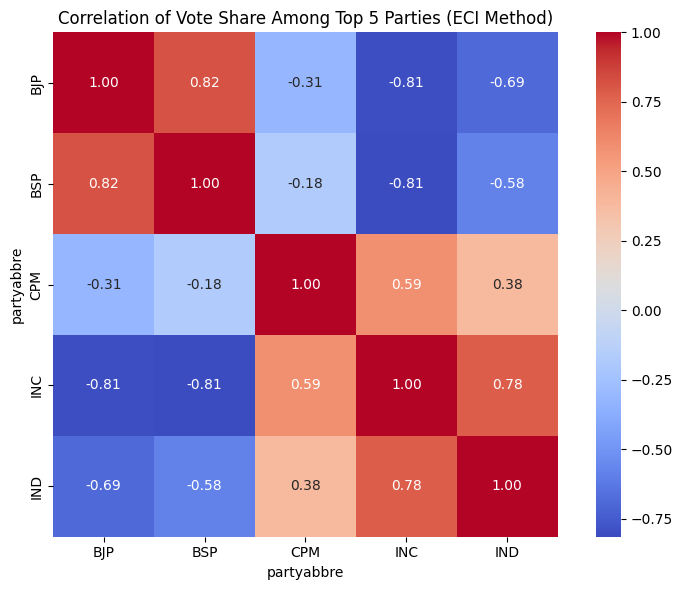

In [ ]:
# Step 1: Total votes per party per year
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 2: Total national votes per year
total_votes = (
    df_lok.groupby(['year'])['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 3: Merge and calculate ECI-style vote share
vote_share_df = pd.merge(party_votes, total_votes, on='year')
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

# Step 4: Get top 5 parties by total votes across all years
top_5_parties = (
    vote_share_df.groupby('partyabbre')['party_votes']
    .sum()
    .nlargest(5)
    .index
)

# Step 5: Filter to top 5 parties only
top_5_df = vote_share_df[vote_share_df['partyabbre'].isin(top_5_parties)]

# Step 6: Pivot for correlation matrix (years as rows, parties as columns)
pivot_df = top_5_df.pivot(index='year', columns='partyabbre', values='vote_share_percent').fillna(0)

# Step 7: Compute correlation matrix
correlation_matrix = pivot_df.corr()

# Step 8: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation of Vote Share Among Top 5 Parties (ECI Method)')
plt.tight_layout()
plt.show()

* party_votes
* total_votes
* vote_share_percent - how much % of the national vote each party recieved in that year

In [ ]:
# Total votes per party per year
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Total national votes per year
total_votes = (
    df_lok.groupby('year')['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Merge to compute vote share
vote_share_df = pd.merge(party_votes, total_votes, on='year')
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100


##Vote Share Trend Over Time (Top 5 Parties)

##Identify the top 5 parties that received the most votes overall across all years.

First, we find the 5 parties that received the most votes overall. Then we filter the main data to keep only those parties, so we can focus on…

#Step 1: Group vote totals by party across all years

In [ ]:
top_5 = (
    vote_share_df.groupby('partyabbre')['party_votes']
    .sum()
)


##Vote Share df[...]-> We are filtering the original data (vote_share df).
#* .isin(top_5)-> This checks if the party in each row is one of the top 5 parties

Result in top_df:A new dataframe containing only the rows where the party is 1 of the top five

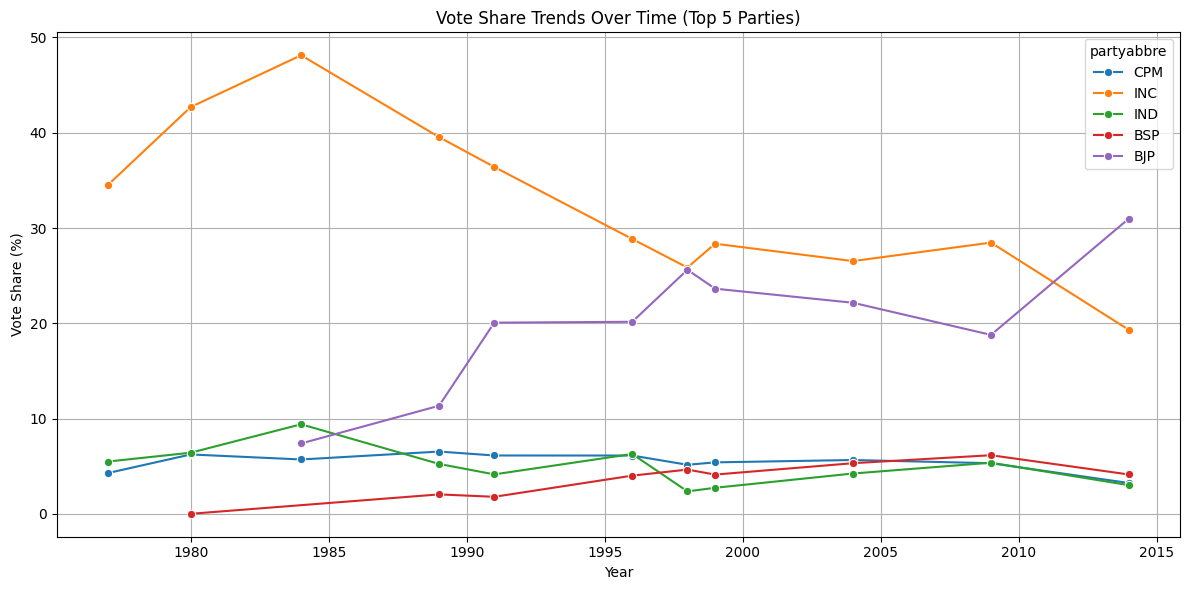

In [ ]:
# Identify top 5 parties by overall votes
top_5 = (
    vote_share_df.groupby('partyabbre')['party_votes']
    .sum()
    .nlargest(5)
    .index
)

# Filter for top 5
top_df = vote_share_df[vote_share_df['partyabbre'].isin(top_5)]

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_df, x='year', y='vote_share_percent', hue='partyabbre', marker='o')
plt.title('Vote Share Trends Over Time (Top 5 Parties)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


* This multiplies the fraction by 100 to show it as a percentage( eg- 0.62-> 62%)

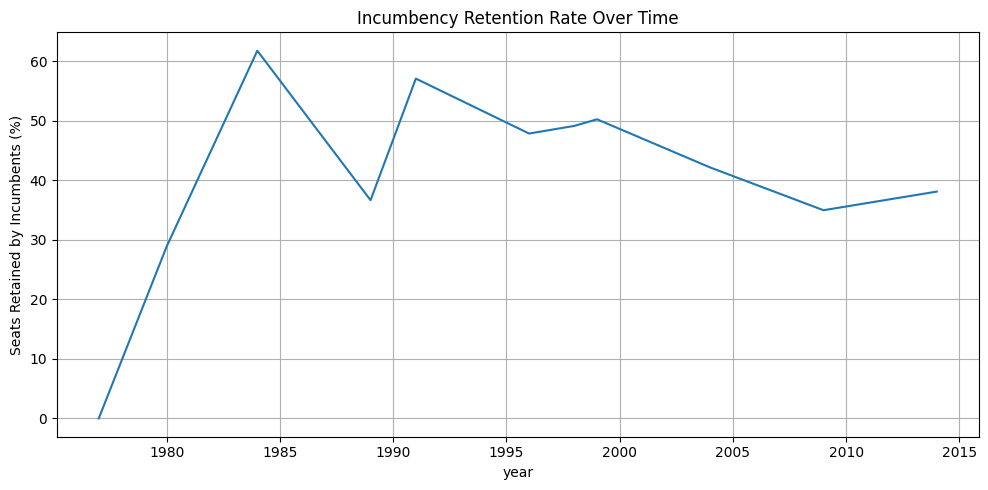

In [ ]:
# Rank candidates per seat
df_lok['rank'] = df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].rank(method='first', ascending=False)
winners = df_lok[df_lok['rank'] == 1].copy()

# Sort by year and match winners in the next cycle
winners.sort_values(by=['st_name', 'pc_no', 'year'], inplace=True)
winners['prev_party'] = winners.groupby(['st_name', 'pc_no'])['partyabbre'].shift()
winners['retained'] = winners['partyabbre'] == winners['prev_party']

# Calculate % of seats retained each year
incumbency = winners.groupby('year')['retained'].mean().reset_index()
incumbency['retained'] = incumbency['retained'] * 100

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=incumbency, x='year', y='retained', markers='o')
plt.title('Incumbency Retention Rate Over Time')
plt.ylabel('Seats Retained by Incumbents (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


#  The result(swing) Tells us:

* A positive number- The party gained vote share,
* A negative number- The party lost vote share

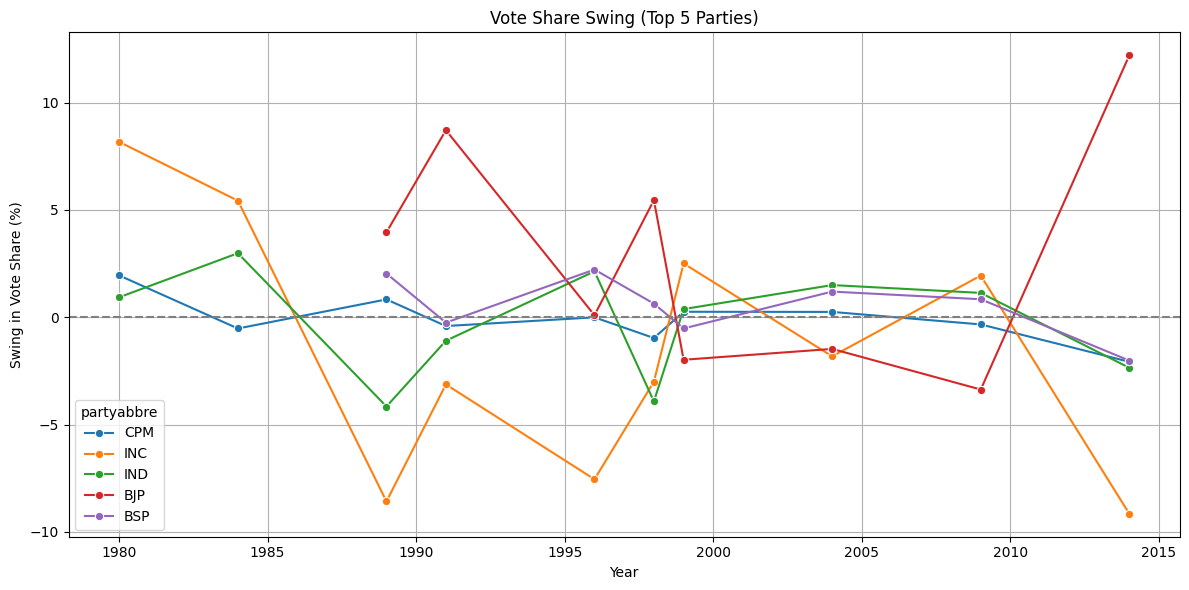

In [ ]:
# Focus on top parties only
swing_df = vote_share_df[vote_share_df['partyabbre'].isin(top_5)].copy()

# Calculate year-over-year change (swing)
swing_df['prev_share'] = swing_df.groupby('partyabbre')['vote_share_percent'].shift()
swing_df['swing'] = swing_df['vote_share_percent'] - swing_df['prev_share']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=swing_df.dropna(), x='year', y='swing', hue='partyabbre', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Vote Share Swing (Top 5 Parties)')
plt.xlabel('Year')
plt.ylabel('Swing in Vote Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
